In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import squidpy as sq
import anndata as ad
import seaborn as sns
import networkx as nx
import pandas as pd
import json
import sys
sys.path.append("../")
from src import *

In [4]:
with open("../configs-ramses.json", "r") as f:
    configs = json.load(f)

In [5]:
real_data, _ = get_mibitof(configs['real_data'])

In [6]:
compute_centrality_measures(real_data)

In [7]:
measure = "betweenness"
d = real_data.obs["distance_to_border"].values
C = real_data.obs[measure].values

In [8]:
a, b, f = fit_log(d, C)

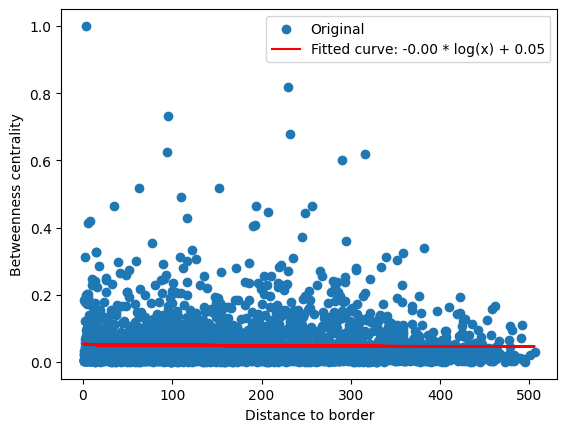

In [9]:
plot_log(d, C, a, b, f, measure=measure, t="real", n=len(real_data))

In [10]:
m_opt, c0_opt, b_opt = fit_piece_wise_linear(d, C)

Set parameter TSPort to value 1790
Set parameter TokenServer to value "license.rrze.de"
Set parameter OptimalityTol to value 0.0001
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: AMD EPYC 7402 24-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 48 physical cores, 96 logical processors, using up to 32 threads

Non-default parameters:
MIPGap  0.01
OptimalityTol  0.0001
TSPort  1790

Optimize a model with 13236 rows, 6621 columns and 39704 nonzeros
Model fingerprint: 0x54a95d3b
Model has 3309 quadratic objective terms
Model has 6618 quadratic constraints
Variable types: 3312 continuous, 3309 integer (3309 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+03]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 1e+03]
  QRHS range       [3e-05

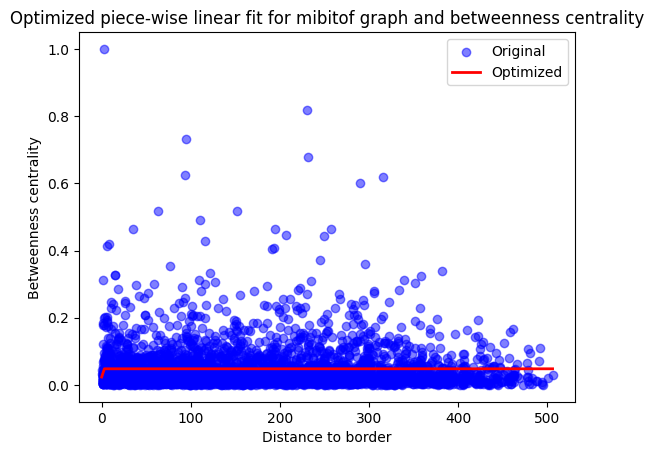

In [12]:
t = "mibitof"
n = len(real_data)
plot_piece_wise_linear(d=d, C=C, m_opt=m_opt, c0_opt=c0_opt, b_opt=b_opt, measure=measure, t=t, n=n, path=f"../result_plots/{t}/{t}_{measure}_{n}.png")

In [13]:
t = "hexagonal"
n = 400
bounds = (0, 20)
coordinates = generate_coordinates(n=n, bounds=bounds, type=t)
original = create_anndata(coordinates, n_neighs=6, bounds=bounds)
original, truncated = fully_process(adata_original=original, bounds=bounds, borders=[0])

In [14]:
measure = "betweenness"
d = original.obs["distance_to_border"].values
C = original.obs[measure].values